Shape of dataset: (993, 16)
Columns: ['R&D_Spend', 'Administration', 'Marketing_Spend', 'Profit', 'R&D_Marketing_Spend', 'Total_Spend', 'ROI', 'State_California', 'State_Florida', 'State_New York', 'R&D_Spend_scaled', 'Administration_scaled', 'Marketing_Spend_scaled', 'Total_Spend_scaled', 'ROI_scaled', 'R&D_Marketing_Spend_scaled']
   R&D_Spend  Administration  Marketing_Spend     Profit  R&D_Marketing_Spend  \
0  165349.20       136897.80        471784.10  192261.83            637133.30   
1  162597.70       151377.59        443898.53  191792.06            606496.23   
2  153441.51       101145.55        407934.54  191050.39            561376.05   
3  144372.41       118671.85        383199.62  182901.99            527572.03   
4  142107.34        91391.77        366168.42  166187.94            508275.76   

   Total_Spend       ROI  State_California  State_Florida  State_New York  \
0    774031.10  0.248390             False          False            True   
1    757873.82  0.253066

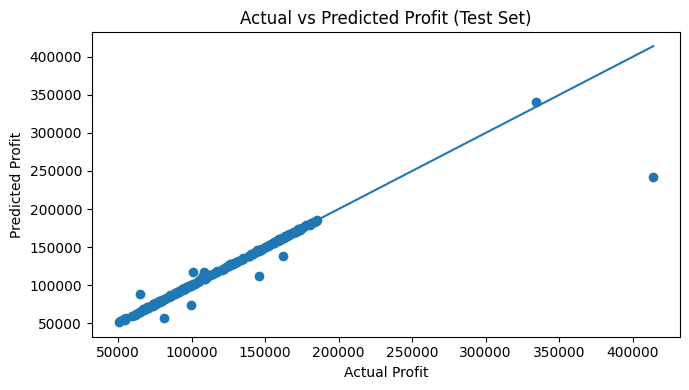

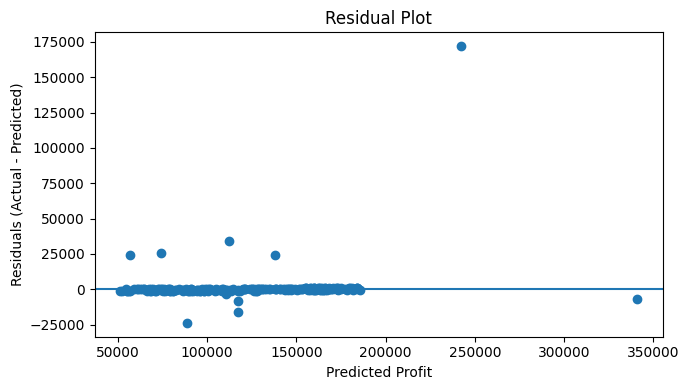

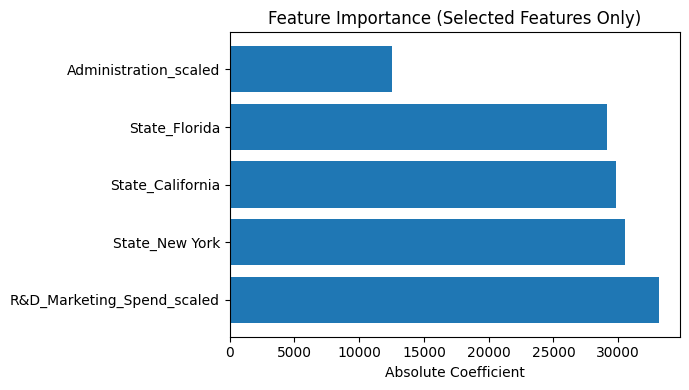

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

# 1. Load Dataset
# ---------------------------------------------------------
file_path = r"C:\\Users\\kuzha\\Downloads\\Final data transfromed dataset.csv.xlsx"
df = pd.read_excel("C:\\Users\\kuzha\\Downloads\\Final data transfromed dataset.csv.xlsx")

print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


# 2. Select Only Required Features + Target
# ---------------------------------------------------------
feature_cols = [
    "Administration_scaled",
    "R&D_Marketing_Spend_scaled",
    "State_California",
    "State_Florida",
    "State_New York",
]

target_col = "Profit"

# Keep only needed columns
df_model = df[feature_cols + [target_col]].copy()

# Convert dummy variables (if bool) to int (0/1)
dummy_cols = ["State_California", "State_Florida", "State_New York"]
for col in dummy_cols:
    df_model[col] = df_model[col].astype(int)

# Drop any missing values just in case
df_model = df_model.dropna(subset=feature_cols + [target_col])

X = df_model[feature_cols]
y = df_model[target_col]

print("\nData used for modeling:")
print(X.head())
print(y.head())


# 3. Train–Test Split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain size:", X_train.shape[0], "| Test size:", X_test.shape[0])


# 4. Fit Linear Regression Model (OLS)
# ---------------------------------------------------------
# Add constant term for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_sm).fit()

print("\n================ OLS SUMMARY ================\n")
print(model.summary())


# 5. Evaluate Model on Test Data
# ---------------------------------------------------------
y_pred = model.predict(X_test_sm)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n================ MODEL EVALUATION ================")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


# 6. Feature Importance (Coefficients)
# ---------------------------------------------------------
coef_table = pd.DataFrame({
    "Feature": model.params.index,
    "Coefficient": model.params.values
})
coef_table["AbsCoeff"] = coef_table["Coefficient"].abs()
coef_table = coef_table.sort_values("AbsCoeff", ascending=False)

print("\n================ FEATURE IMPORTANCE ================\n")
print(coef_table)


# 7. Find the “Best Profit” According to the Model
#    (Row with highest predicted profit)
# ---------------------------------------------------------
# Predict profit for ALL rows using the trained model
X_all_sm = sm.add_constant(X)  # use full X, not only train
df_model["Predicted_Profit"] = model.predict(X_all_sm)

best_idx = df_model["Predicted_Profit"].idxmax()
best_row = df_model.loc[best_idx]

print("\n================ BEST PREDICTED PROFIT ================")
print("Index:", best_idx)
print("Features & Actual vs Predicted Profit:")
print(best_row)

print(f"\nBest Predicted Profit (according to model): {best_row['Predicted_Profit']:.2f}")
print(f"Actual Profit at that row                : {best_row['Profit']:.2f}")


# 8. VISUALIZATIONS
# ---------------------------------------------------------
plt.rcParams["figure.figsize"] = (7, 4)

# 8.1 Actual vs Predicted Profit (Test Set)
# ---------------------------------------------------------
plt.figure()
plt.scatter(y_test, y_pred)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])  # ideal line
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (Test Set)")
plt.tight_layout()
plt.show()


# 8.2 Residual Plot (Test Set)
# ---------------------------------------------------------
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()


# 8.3 Feature Importance Bar Chart (by Coefficient Magnitude)
# ---------------------------------------------------------
coef_plot = coef_table[coef_table["Feature"] != "const"].copy()

plt.figure()
plt.barh(coef_plot["Feature"], coef_plot["AbsCoeff"])
plt.xlabel("Absolute Coefficient")
plt.title("Feature Importance (Selected Features Only)")
plt.tight_layout()
plt.show()


In [9]:
!pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
